# Machine Learning Workshop - Binus

## Dataset Info

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies : Number of times pregnant
- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure : Diastolic blood pressure (mm Hg)
- SkinThickness : Triceps skin fold thickness (mm)
- Insulin : 2-Hour serum insulin (mu U/ml)
- BMI : Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction : Diabetes pedigree function
- Age : Age (years)
- Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Load data and Simple EDA

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [92]:
#Loading the dataset
diabetes_data = pd.read_csv('https://raw.githubusercontent.com/afif2100/ds-workshop/master/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [94]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<b>The Question creeping out of this summary</b>
<br>Can minimum value of below listed columns be zero (0)?
<br>On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI


<br> It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [95]:
##copy the data
diabetes_data_copy = diabetes_data.copy(deep = True)

## reeplace 0 with NaN
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[
    ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
].replace(0,np.NaN)


## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


To fill these Nan values the data distribution needs to be understood

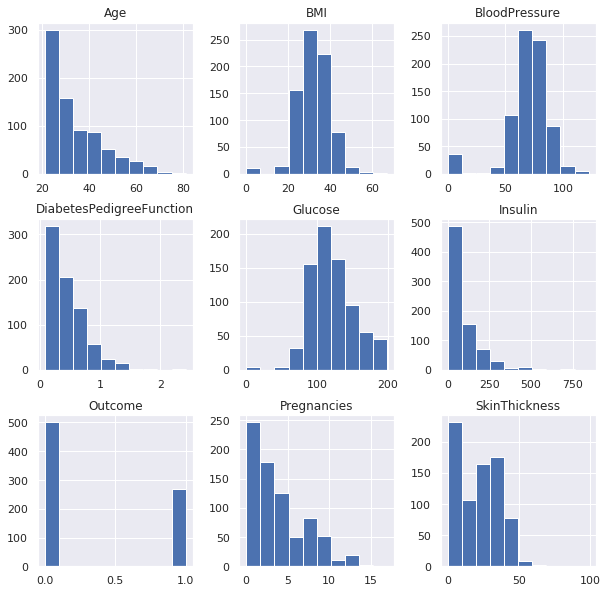

In [96]:
p = diabetes_data.hist(figsize = (10,10))

<b>Skewness</b>

- A <b>left-skewed</b> distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.
<br>
- A <b>right-skewed</b> distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.




![Skewness](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)

to learn more about skewness <br>
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

To fill these Nan values the data distribution needs to be understood
<br>Aiming to impute nan values for the columns in accordance with their distribution

In [0]:
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)


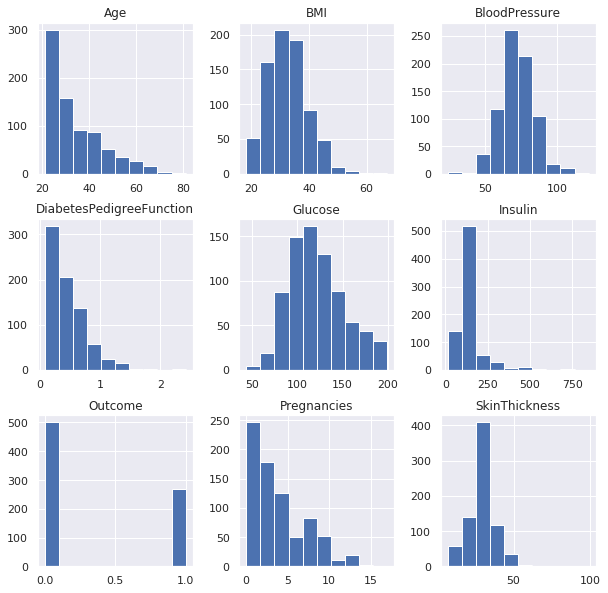

In [98]:
p = diabetes_data_copy.hist(figsize = (10,10))

## Scatter Matrix

data before imputation

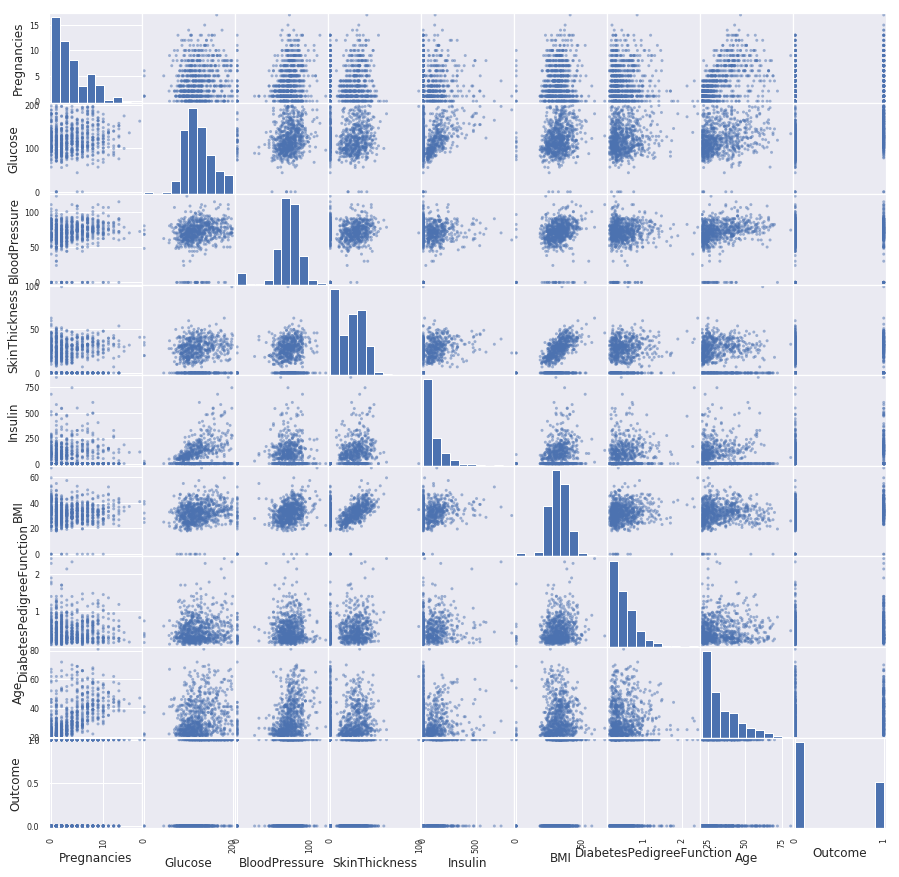

In [99]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(15, 15))

data after imputation

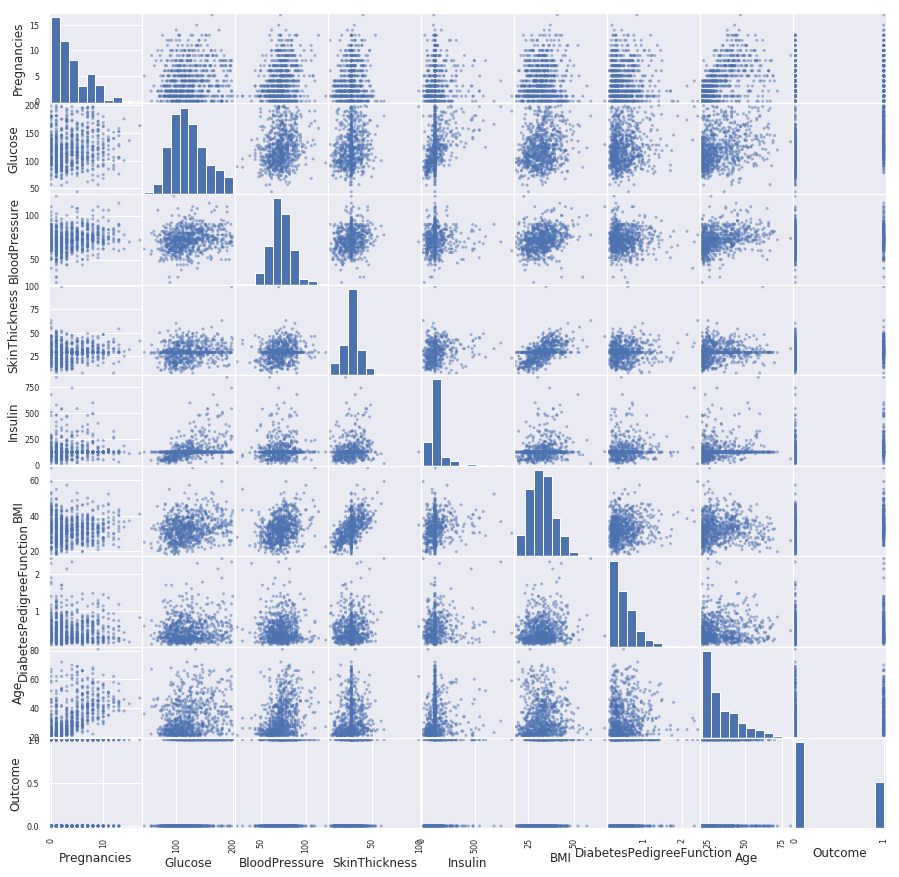

In [100]:
p=scatter_matrix(diabetes_data_copy,figsize=(15,15))

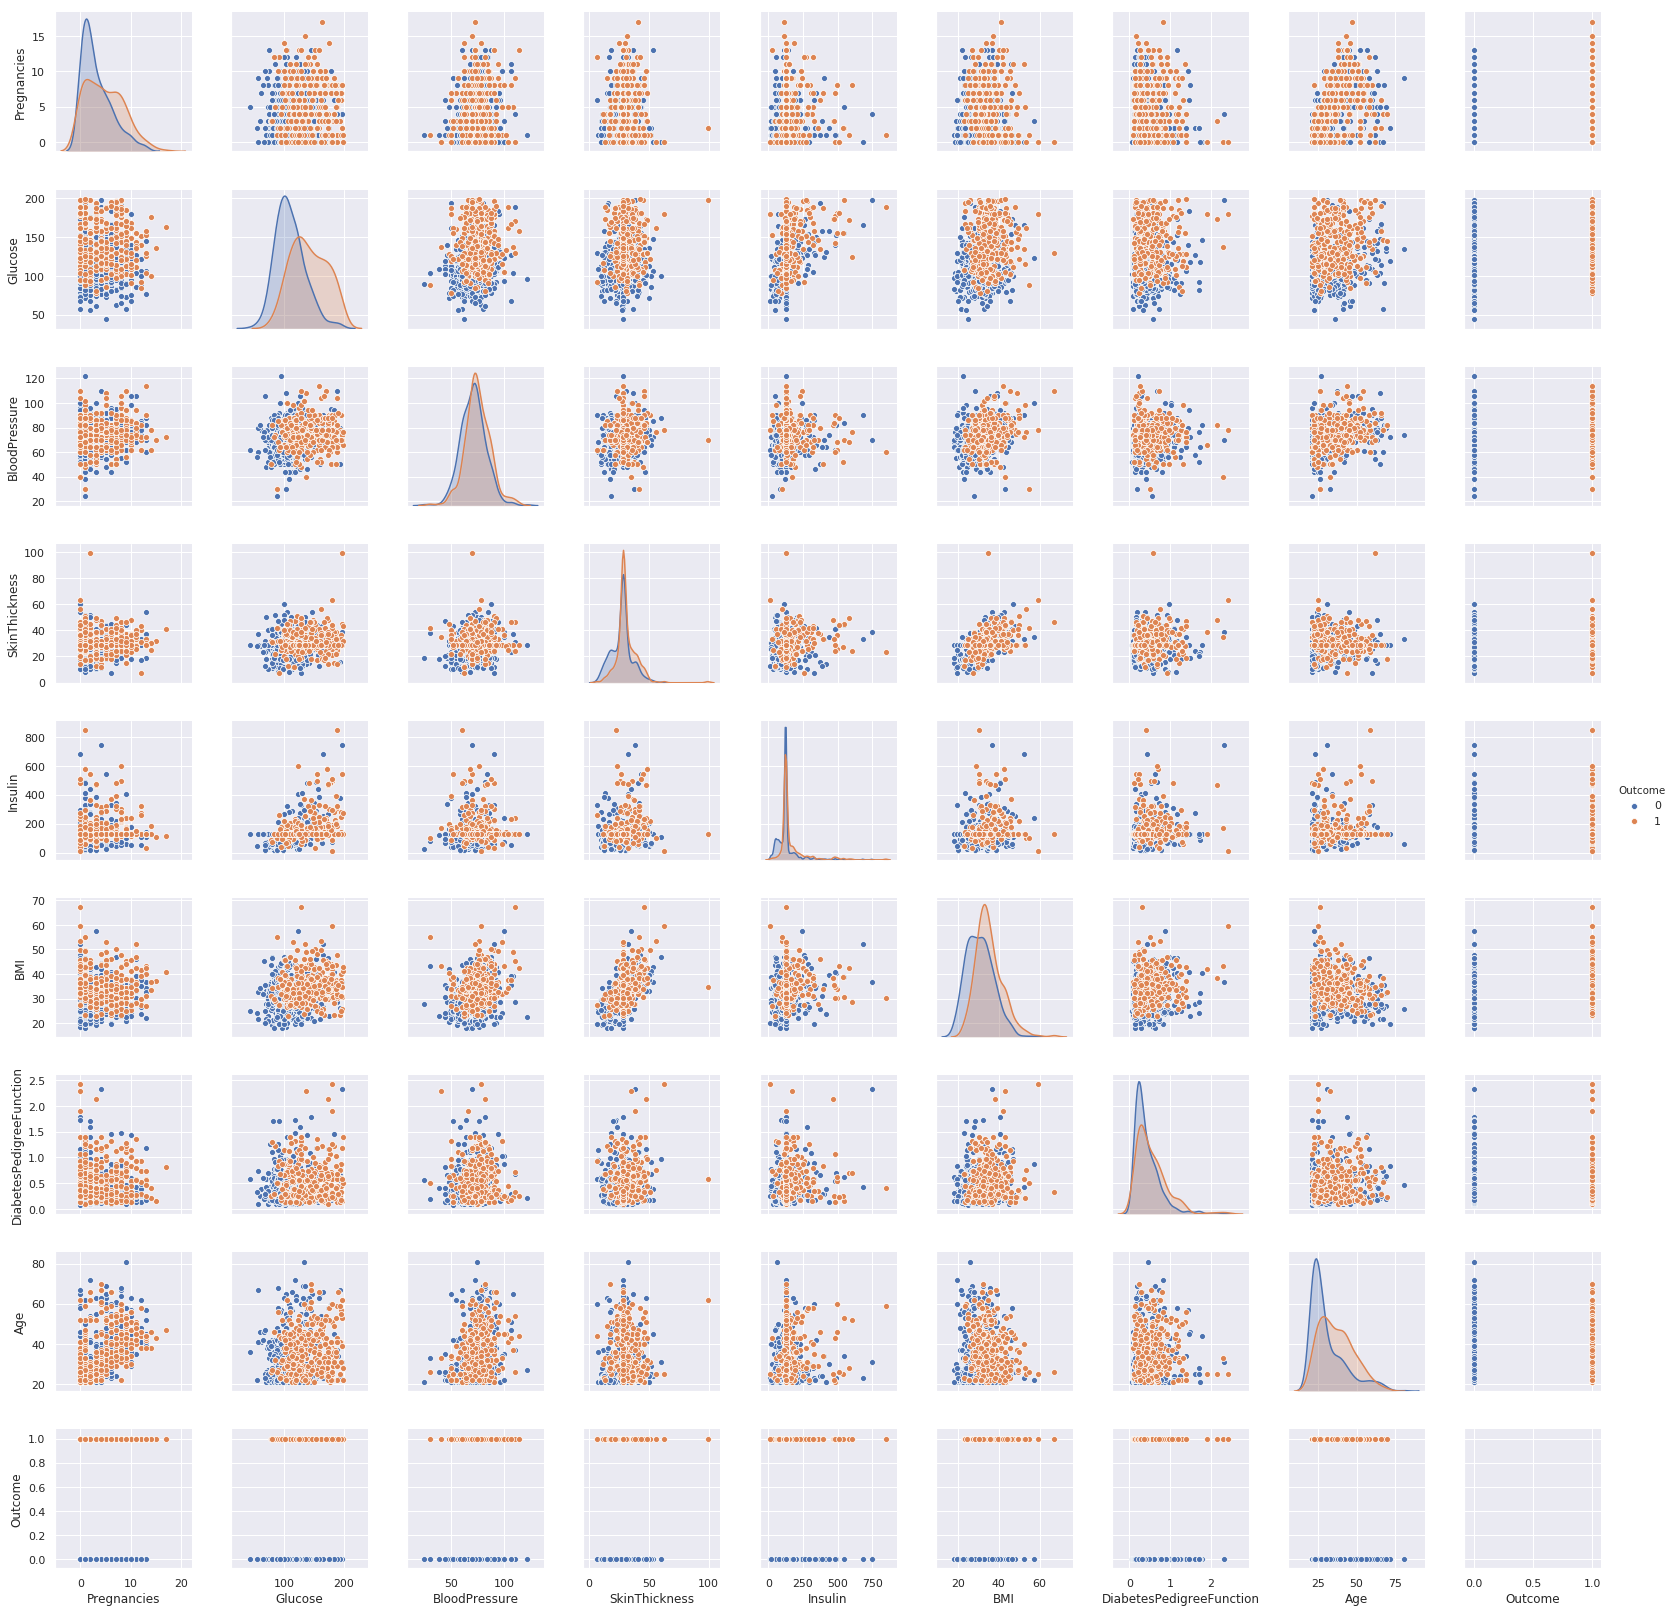

In [101]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

<b>Pearson's Correlation Coefficient: </b>

helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

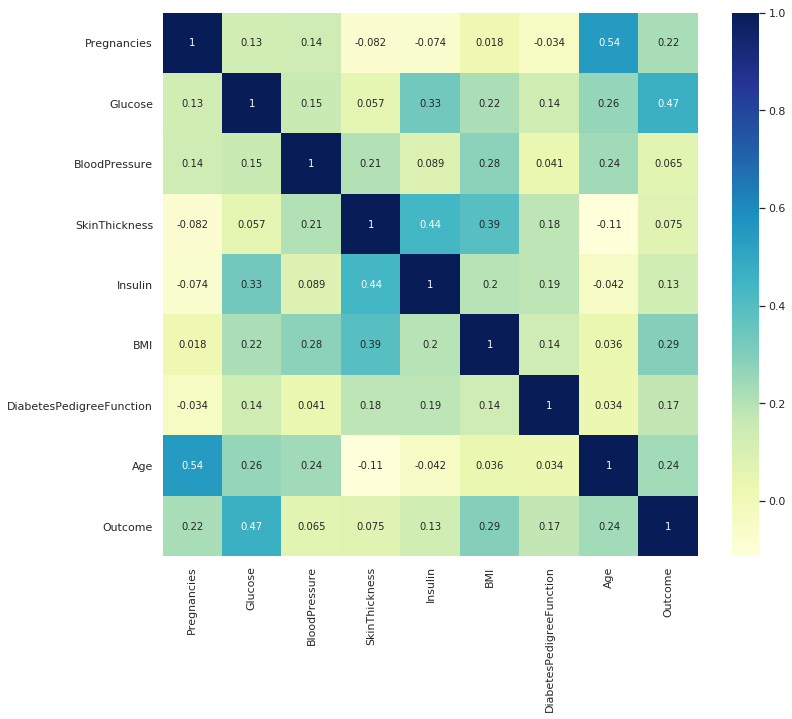

In [102]:
#heatmap for unclean data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='YlGnBu')  # seaborn has very simple solution for heatmap

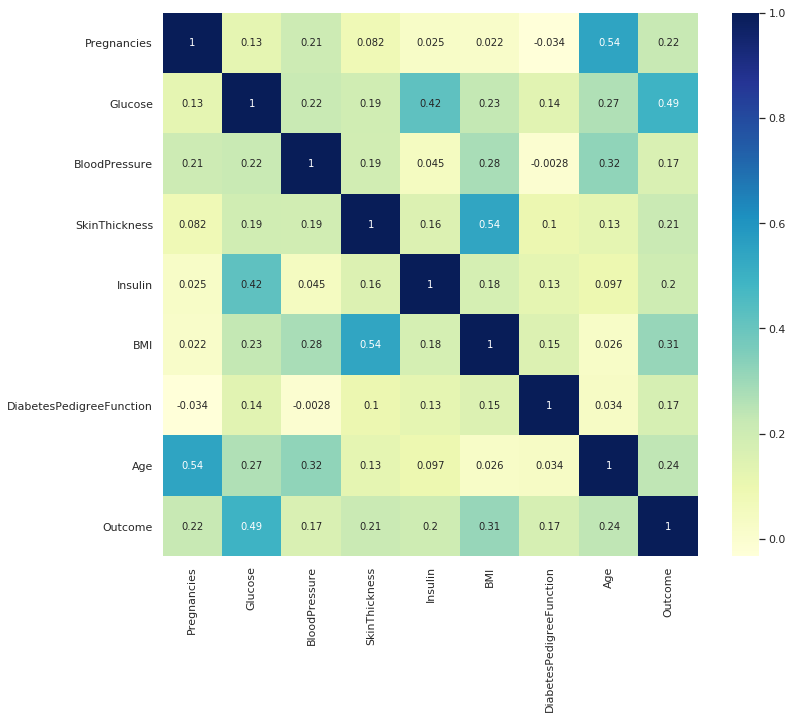

In [103]:
#heatmap for clean data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='YlGnBu')  # seaborn has very simple solution for heatmap

# Scaling the data

to learn more about scaling techniques
- https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc 
- https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [104]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1)),
        columns=['Pregnancies'
                 , 'Glucose'
                 , 'BloodPressure'
                 , 'SkinThickness'
                 , 'Insulin'
                 , 'BMI'
                 , 'DiabetesPedigreeFunction'
                 , 'Age'])

display(X.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [0]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

In [106]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [107]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,-3.301757e-16,6.966722e-16,-1.795800e-16,4.416317e-17,2.815312e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.541850e+00,4.102655e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00


# Create train test split

In [0]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20, stratify=y) 

In [109]:
print("Original dataset   X :{}   Y:{}".format(X.shape,y.shape))
print("Training dataset   X :{}   Y:{}".format(X_train.shape,y_train.shape))
print("Testing  dataset   X :{}   Y:{}".format(X_test.shape,y_test.shape))

Original dataset   X :(768, 8)   Y:(768,)
Training dataset   X :(614, 8)   Y:(614,)
Testing  dataset   X :(154, 8)   Y:(154,)


# Model Training

In [121]:
#create logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Eveluation

## Confusion Matrix 

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.


![Confusion Matrix](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png "CF")

<b>In the famous cancer example:</b>

- Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.
- Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.
- Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.
- Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.


![Confusion Matrix](https://cdn-images-1.medium.com/max/1600/0*9r99oJ2PTRi4gYF_.jpg "CF")


For Reference: https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327

In [122]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

## predict the testing dataset
y_pred = model.predict(X_test)

##create confusion matrix to compare the actual data
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,95,5,100
1,24,30,54
All,119,35,154


Text(0.5, 12.5, 'Predicted label')

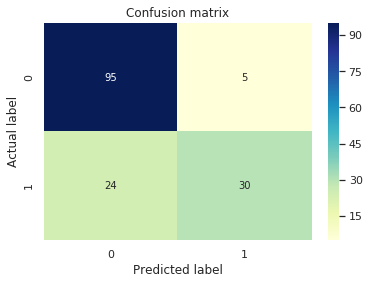

In [112]:
#predict test dataset
y_pred = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Classification Report

Report which includes Precision, Recall and F1-Score.

<b>Precision Score </b>

    TP – True Positives
    FP – False Positives

    Precision – Accuracy of positive predictions.
    Precision = TP/(TP + FP)


<b>Recall Score</b>

    FN – False Negatives

    Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
    Recall = TP/(TP+FN)


<b>F1 Score</b>

    F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
    F1 Score takes into account precision and the recall. 
    It is created by finding the the harmonic mean of precision and recall.

F1 = 2 x (precision x recall)/(precision + recall)

Precision = TP/(TP+FP)
- Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.


Recall = TP/(TP+FN)
- Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.


F1 Score = 2(Recall Precision) / (Recall + Precision)
- F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.



For Reference: 
- http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/ 
- https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [128]:
#import classification_report
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       100
           1       0.86      0.56      0.67        54

    accuracy                           0.81       154
   macro avg       0.83      0.75      0.77       154
weighted avg       0.82      0.81      0.80       154



## ROC - AUC

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

In [0]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

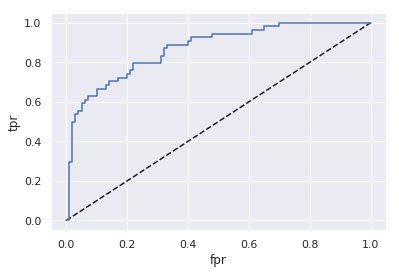

In [130]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [131]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8696296296296296

Select Another Classification Method

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lda = LinearDiscriminantAnalysis()
nb = GaussianNB()
svm = SVC()

In [132]:
dt.fit(X_train,y_train)
knn.fit(X_train,y_train)
nb.fit(X_train,y_train)
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)